In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
file = "./data/G7NZCJ008009296-tempo_config-true-null-null-null-1969-12-31-20-19-21.csv"
# open csv file and read it into a pandas dataframe
df = pd.read_csv(file)
# label the columns
columns = ['time', 'tag1', 'tag2', 'x_acc', 'y_acc', 'z_acc']
df.columns = columns
# drop the tag columns
df = df.drop(['tag1', 'tag2'], axis=1)
# make the time indexed from 0
df['time'] = df['time'] - df['time'].iloc[0]
# print the head of the dataframe
print(df.head())

   time     x_acc     y_acc      z_acc
0     0  0.787961 -0.732876   9.998009
1     5  0.716111 -0.696951  10.047107
2    10  0.771196 -0.756826  10.140512
3    15  0.797542 -0.771196  10.075848
4    20  0.777184 -0.729283  10.168056


(11940.028600243999+0j) 0


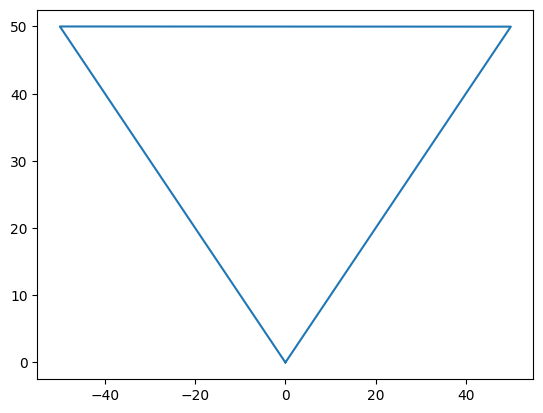

In [20]:
# perform fft on the x_acc column
x_acc_fft = np.fft.fft(df['x_acc'])
# plot the fft
# plt.plot(x_acc_fft)
# get the max value of the fft
max_val = np.max(x_acc_fft)
# get the index of the max value
max_index = np.argmax(x_acc_fft)
# print the max value and index
print(max_val, max_index)

# find the frequency of the x_acceleration
x_acc_freq = np.fft.fftfreq(len(df['x_acc']), d=0.01)
# plot the frequency
plt.plot(x_acc_freq, abs(x_acc_freq))

1979
1979
[ 25.02525253  25.05050505  25.07575758 ... -25.07575758 -25.05050505
 -25.02525253]


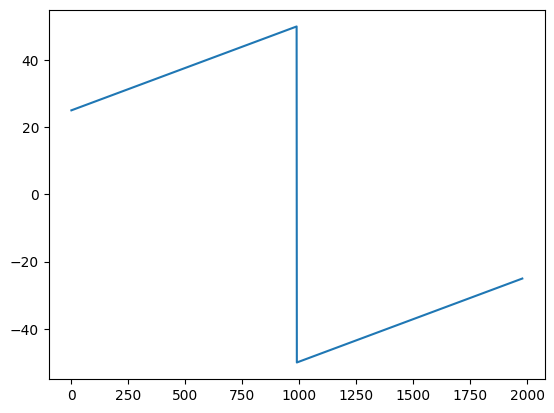

In [28]:
thresh = 0.5 * max(abs(x_acc_freq))
mask = abs(x_acc_freq) > thresh
# print how many true values are not false
print(np.sum(mask))
peaks = x_acc_freq[mask]
print(len(peaks))
print(peaks)
plt.plot(peaks)